## Practice notebook for regression analysis with NHANES

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [4]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Thu, 23 Dec 2021   Prob (F-statistic):              0.131
Time:                        10:22:20   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Older people.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

They are nearly uncorrelated in this data set.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [5]:
0.0091 * 20

0.182

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

0.1%.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [27]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1:"Mexican American", 2:"Other Hispanic",
                                      3:"Non-Hispanic White", 4:"Non-Hispanic Black",
                                      5:"Other Race - Including Multi-Racial"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})

In [7]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           5.55e-27
Time:                        10:22:20   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.6846      0.682     46.453      0.000      30.347      33.023
RIDRETH1x[T.Non-Hispanic Black]                     -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non-Hispanic White]                     -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Other Hispanic]                         -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIAGENDRx[T.Male]                                   -1.2017      0.407     -2.949      0.003      -2.001      -0.402
RIDAGEYR                                             0.0058      0.010      0.560      0.576      -0.015       0.026
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

It has dropped from 0.0091 to 0.0065

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

It dropped from 0.006 to 0.005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

__Q2d.__ What reference level did the software select for the ethnicity variable?

The ethnicity of Mexican American and Female is selected as the reference level.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [8]:
-0.45 * 10

-4.5

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [9]:
-1.02 + 0*0.0065

-1.02

The man's BMI will on average be around 1.02 units lower.

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [10]:
dax = da.sample(frac = 0.25)
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data = dax)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.868
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           6.43e-07
Time:                        10:22:20   Log-Likelihood:                -1250.6
No. Observations:                 368   AIC:                             2515.
Df Residuals:                     361   BIC:                             2542.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           32.0734      1.392     23.034      0.000      29.335      34.812
RIDRETH1x[T.Non-Hispanic Black]                     -1.4317      1.163     -1.231      0.219      -3.719       0.856
RIDRETH1x[T.Non-Hispanic White]                     -1.1506      1.177     -0.978      0.329      -3.464       1.163
RIDRETH1x[T.Other Hispanic]                         -2.6816      1.409     -1.903      0.058      -5.452       0.089
RIDRETH1x[T.Other Race - Including Multi-Racial]    -6.5466      1.254     -5.221      0.000      -9.012      -4.081
RIAGENDRx[T.Male]                                   -1.4920      0.855     -1.746      0.082      -3.173       0.189
RIDAGEYR                                             0.0115      0.022      0.522      0.602      -0.032       0.055
==============================================================================
Omnibus:                       53.783   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.403
Skew:                           0.937   Prob(JB):                     5.73e-18
Kurtosis:                       4.292   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

The values of the estimated regression coefficients all went up as well as the standard errors. Even though the coefficients all changed a bit, the way of how they affect the dataset stays the same.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


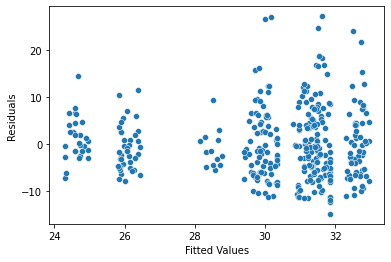

In [11]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted Values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

The variance increases systematically with the mean with the range 27 to 28.5 being empty.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [12]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx", data = da)
result = model.fit()

C:\Users\danie\anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'SMQ020', 'BPXSY1', 'ALQ110', 'DMDEDUC2', 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


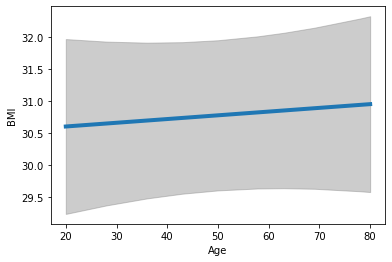

In [13]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.
values = {"RIDRETH1x":"Mexican American", "RIAGENDRx":"Male"}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                               values = values, ci_method = "simultaneous")

ax = sns.lineplot(fv, pr, lw = 4)
ax.fill_between(fv, cb[:,0], cb[:,1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [14]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x + RIAGENDRx + DMDEDUC2", data = da)
resultx = model.fit()

C:\Users\danie\anaconda3\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'SMQ020', 'BPXSY1', 'ALQ110', 'RIAGENDR', 'RIDRETH1' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


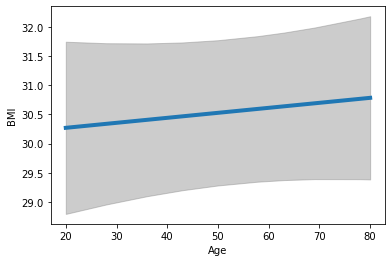

In [15]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.
# controlling for gender and ethnicity same as the previous question.
values = {"RIDRETH1x":"Mexican American", "RIAGENDRx":"Male", 
         "DMDEDUC2": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(resultx, "RIDAGEYR",
                               values = values, ci_method = "simultaneous")

ax = sns.lineplot(fv, pr, lw = 4)
ax.fill_between(fv, cb[:,0], cb[:,1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__Q6a.__ What is your interpretation of the added variable plot?

After adding education level plus controlling gender and ethnicity the same way as we did in the previous question, we can see that having education level of "Less than 9th grade" lower the lower bound of BMI.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [16]:
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", "ALQ110"]
da = da[vars].dropna()

In [17]:
da["ALQ"] = da.ALQ110.replace({2:0, 7:np.nan, 9:np.nan})

we look at the odds of "at least 12 drinks in their lifetime" for women and men separately.

In [20]:
c = pd.crosstab(da.RIAGENDRx, da.ALQ).apply(lambda x: x/x.sum(), axis = 1)
c["odds"] = c.loc[:,1] / c.loc[:,0]
c

ALQ,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549228,0.450772,0.820738
Male,0.537037,0.462963,0.862069


We see that th probability that a women has ever had at least 12 drinks in their lifetime is slightly lower than the probability for man (45% v.s. 46%). 
This is reflected in the odds for a woman has had at least 12 drinks in their lifetime being a little less than 1 (around 0.82), and the odds for a man is around 0.86.

In [21]:
c["logodds"] = np.log(c.odds)
c

ALQ,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,0.820738,-0.197551
Male,0.537037,0.462963,0.862069,-0.148420


The log odds for both males and females are close to 0, consistent with around half of both males and females having had "at least 12 drinks in their lifetime".

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

No.

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

No

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [22]:
model = sm.GLM.from_formula("ALQ ~ RIAGENDRx", family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ALQ   No. Observations:                 1468
Model:                            GLM   Df Residuals:                     1466
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1011.3
Date:                Thu, 23 Dec 2021   Deviance:                       2022.6
Time:                        10:23:18   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.1976      0.062     -3.164      0.002      -0.320      -0.075
RIAGENDRx[T.Male]     0.0491      0.115      0.427      0.669      -0.176       0.274
=====================================================================================
"""

__Q8.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [30]:
c.logodds.Male - c.logodds.Female

0.0491311713391602

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [32]:
# Create a labeled version of the educational attainment variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

In [34]:
model = sm.GLM.from_formula("ALQ ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family = sm.families.Binomial(), data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ALQ   No. Observations:                 1467
Model:                            GLM   Df Residuals:                     1460
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -987.65
Date:                Thu, 23 Dec 2021   Deviance:                       1975.3
Time:                        10:53:43   Pearson chi2:                 1.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4849      0.193     -2.519      0.012      -0.862      -0.108
RIAGENDRx[T.Male]            0.0313      0.117      0.267      0.789      -0.198       0.261
DMDEDUC2x[T.HS]             -0.0278      0.163     -0.170      0.865      -0.348       0.292
DMDEDUC2x[T.SomeCollege]     0.1147      0.152      0.756      0.450      -0.183       0.412
DMDEDUC2x[T.lt9]            -0.8479      0.176     -4.814      0.000      -1.193      -0.503
DMDEDUC2x[T.x9_11]          -0.4496      0.190     -2.367      0.018      -0.822      -0.077
RIDAGEYR                     0.0090      0.003      2.975      0.003       0.003       0.015
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

Education and Age (with a very small p-value)

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

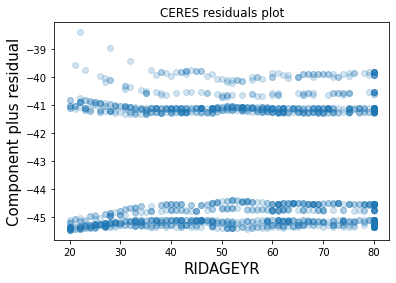

In [39]:
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)